## Advanced Lane Finding Project

The goals / steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

---
## First, I'll compute the camera calibration using chessboard images

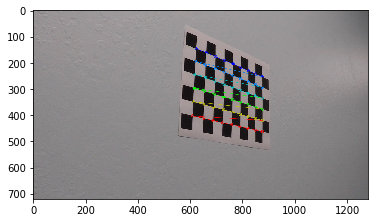

In [15]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
%matplotlib qt
%matplotlib inline
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('./camera_cal/calibration*.jpg')

CAMERA_CALIBRATION_COEFFICIENTS_FILE = '../camera_cal/calibrated_data.p'

# Step through the list and search for chessboard corners
for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6),None)

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (9,6), corners, ret)
        plt.imshow(img)
        #plt.show()
        #cv2.imshow('img',img)
        #cv2.waitKey(500)

#image_size = (image.shape[1], image.shape[0])
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

#calibrated_data = {'mtx': mtx, 'dist': dist}
#with open(CAMERA_CALIBRATION_COEFFICIENTS_FILE, 'wb') as f:
#    pickle.dump(calibrated_data, file=f)
            
cv2.destroyAllWindows()

## And so on and so forth...

In [16]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec
import numpy as np
import cv2
import glob
import os
from moviepy.editor import VideoFileClip

import advanced_lane_lines
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


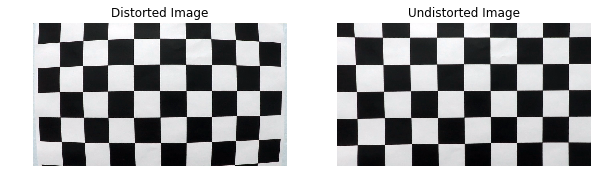

In [26]:
%load_ext autoreload
%autoreload 2

# Make a list of calibration images
images = glob.glob('./camera_cal/calibration*.jpg')

# Take example distorted image and undistort it using saved camera coefficients
distorted_image = './camera_cal/calibration1.jpg'
distorted_image = cv2.imread(distorted_image)
undistorted_image = advanced_lane_lines.cal_undistort(distorted_image, mtx, dist)

# Display both distorted and undistorted images
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.axis('off')
plt.title('Distorted Image')
plt.imshow(distorted_image)


plt.subplot(1, 2, 2)
plt.imshow(undistorted_image)
plt.axis('off')
plt.title('Undistorted Image')

plt.show()

In [45]:
undistorted_dest_location = '.\\output_images\\camera_cal\\'
calibration_images = glob.glob('.\\camera_cal\\calibration*.jpg')

for image_file in calibration_images:
    dest_path = os.path.join(undistorted_dest_location , os.path.split(image_file)[1])
    image = cv2.imread(image_file)
    undistorted_image = advanced_lane_lines.cal_undistort(image, mtx, dist)
    # Save undistorted image
    cv2.imwrite(dest_path, undistorted_image)